### Name: Dhaval Patel
### Title: Assignment 4 - Neural Networks

In [3]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings
warnings.filterwarnings("ignore")

In [4]:
INFILE = "cleandata_hmeqloss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )
'''
Print a transpose of the data so that it will fit on the screen cleaned data missing numeric values already imputed
'''
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
z_REASON_DebtCon,0.000000,0.000000,0.000000,0.000000,0.000000
z_REASON_HomeImp,1.000000,1.000000,1.000000,0.000000,1.000000
z_JOB_Mgr,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
z_JOB_Other,1.000000,1.000000,1.000000,0.000000,0.000000
z_JOB_ProfExe,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Sales,0.000000,0.000000,0.000000,0.000000,0.000000


TRUNC_LOAN
TRUNC_IMP_VALUE
TRUNC_IMP_MORTDUE
TRUNC_IMP_YOJ
TRUNC_IMP_DEROG
TRUNC_IMP_DELINQ
TRUNC_IMP_CLAGE
TRUNC_IMP_NINQ
TRUNC_IMP_CLNO
TRUNC_IMP_DEBTINC
REG_ALL RMSE ACCURACY
REG_ALL_Train  =  3421.268456146362
REG_ALL  =  3115.7180904557335
------


REG_TREE RMSE ACCURACY
REG_TREE_Train  =  4307.4749817092925
REG_TREE  =  4301.963358361031
------





('M_DEBTINC', 100)
('TRUNC_IMP_DEBTINC', 55)
('TRUNC_IMP_CLAGE', 37)
('TRUNC_IMP_VALUE', 31)
('TRUNC_LOAN', 31)
('TRUNC_IMP_MORTDUE', 29)
('TRUNC_IMP_DELINQ', 27)
('TRUNC_IMP_CLNO', 25)
('TRUNC_IMP_YOJ', 22)
('TRUNC_IMP_DEROG', 17)
('TRUNC_IMP_NINQ', 14)



('TRUNC_LOAN', 100)
('TRUNC_IMP_CLNO', 13)
('TRUNC_IMP_DEBTINC', 6)
('M_DEBTINC', 4)
REG_RF RMSE ACCURACY
REG_RF_Train  =  4384.862092423268
REG_RF  =  4360.610292020044
------



CRASH
---------
Total Variables:  12
INTERCEPT  =  -5.024385024464235
M_DEBTINC  =  2.7367266697072807
TRUNC_IMP_DEBTINC  =  0.09714715358319527
TRUNC_IMP_CLAGE  =  -0.005895724656102216
TRUNC_IMP_VALUE  

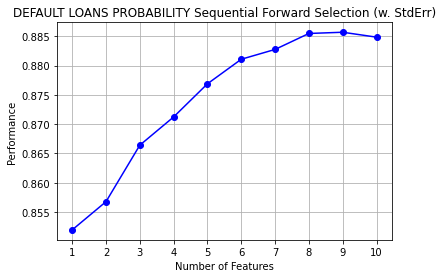

Variables Selected By SFS: 

TRUNC_IMP_DEBTINC
M_VALUE
M_DEROG
M_DEBTINC
TRUNC_IMP_VALUE
TRUNC_IMP_DEROG
O_IMP_DELINQ
TRUNC_IMP_DELINQ
TRUNC_IMP_CLAGE

CRASH
---------
Total Variables:  9
INTERCEPT  =  -5.2521293883053
M_DEBTINC  =  2.742929396140437
TRUNC_IMP_DEBTINC  =  0.10598727235861755
TRUNC_IMP_DELINQ  =  0.7072470866432996
TRUNC_IMP_CLAGE  =  -0.006083874024619719
TRUNC_IMP_DEROG  =  0.7536919219747834
M_VALUE  =  3.5431455007999793
TRUNC_IMP_CLNO  =  -0.015850265058640903
TRUNC_IMP_YOJ  =  -0.013365840769975776


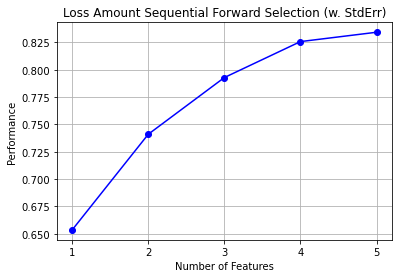

 ................... 
argmax
feature_names    (0, 1, 2, 3, 4)
avg_score               0.834263
Name: 5, dtype: object
 ................... 
('0', '1', '2', '3', '4')
TRUNC_LOAN
TRUNC_IMP_CLNO
TRUNC_IMP_DEBTINC
M_DEBTINC
TRUNC_IMP_CLAGE


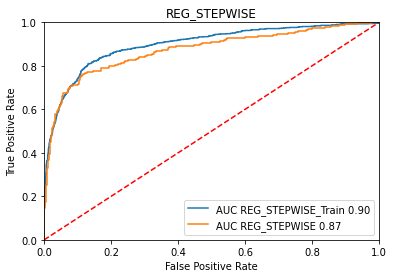

REG_STEPWISE CLASSIFICATION ACCURACY
REG_STEPWISE_Train  =  0.8856963087248322
REG_STEPWISE  =  0.8842281879194631
------


For one of the Regression Models, print the coefficients. Do the variables make sense?

CRASH
---------
Total Variables:  10
INTERCEPT  =  -5.357029791093792
TRUNC_IMP_DEBTINC  =  0.10530606571813604
M_VALUE  =  3.7092594452274983
M_DEROG  =  -0.7853106477725912
M_DEBTINC  =  2.7445553988137954
TRUNC_IMP_VALUE  =  -7.725928819978311e-07
TRUNC_IMP_DEROG  =  0.6924412080601994
O_IMP_DELINQ  =  2.0481893401790754
TRUNC_IMP_DELINQ  =  0.6177869545230693
TRUNC_IMP_CLAGE  =  -0.0068396349908037115
REG_STEPWISE RMSE ACCURACY
REG_STEPWISE_Train  =  4043.551329405321
REG_STEPWISE  =  4029.784013571014
------



DAMAGES
---------
Total Variables:  6
INTERCEPT  =  -12990.102898292584
TRUNC_LOAN  =  0.7811032153671928
TRUNC_IMP_CLNO  =  296.7807595041021
TRUNC_IMP_DEBTINC  =  193.84552770224016
M_DEBTINC  =  5766.1336424739575
TRUNC_IMP_CLAGE  =  -25.06345014576536


In [5]:
"""
Remove Outliers
"""

dt = df.dtypes #give me a list of all the variable in my dataframe
numList = []
for i in dt.index :
#     print(i, dt[i])
    if i in ( [ TARGET_F, TARGET_A ] ) : continue #going to throw away my target variables for right now 
    if dt[i] in (["float64","int64"]) : numList.append( i ) #only going to keep numeric variables put it inside numlist

for i in numList :
#     print(" ------- ")
#     print(i)
    theMean = df[i].mean()
    theSD = df[i].std()
    theMax = df[i].max()
    theCutoff = round( theMean + 3*theSD )
    if "z_" in i or "M_" in i : continue
    if theMax < theCutoff : continue
    FLAG = "O_" + i
    TRUNC = "TRUNC_" + i
    df[ FLAG ] = ( df[i] > theCutoff )+ 0
    df[ TRUNC ] = df[ i ]
    df.loc[ df[TRUNC] > theCutoff, TRUNC ] = theCutoff
    df = df.drop( i, axis=1 )

dt = df.dtypes
numList = []
for i in dt.index :
#     print(i, dt[i])
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if "O_" in i or "z_" in i  or "M_" in i : continue
    if dt[i] in (["float64","int64"]) : numList.append( i )

for i in numList :
    print(i)


"""
SPLIT DATA 
"""
X = df.copy() #making an exact copy of our dataframe
X = X.drop(TARGET_F, axis=1) #dropping target flag variable
X = X.drop(TARGET_A, axis=1) #dropping target damage amount variable
Y = df[[TARGET_F, TARGET_A]] #Y variable is only going to have target variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)

F = ~ Y_train[TARGET_A].isna()   
W_train = X_train[F].copy() #Flag for input variables its better practice to make a copy of it 
Z_train = Y_train[F].copy() #Flag for target variables its better practice to make a copy of it

F = ~ Y_test[TARGET_A].isna()   
W_test = X_test[F].copy() #Flag for input variables its better practice to make a copy of it 
Z_test = Y_test[F].copy() #Flag for target variables its better practice to make a copy of it


#Handling Outliers for Target Variables TARGET_LOSS_AMT 
F = Z_train[TARGET_A] > 55000     #let's cap it at 55000 dollars worth of loss amount if the loans defaults
Z_train.loc[F, TARGET_A] = 55000 

F = Z_test[TARGET_A] > 55000
Z_test.loc[F, TARGET_A] = 55000


"""
MODEL ACCURACY METRICS
"""

def getProbAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    probs = MODEL.predict_proba( X )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

def print_ROC_Curve( TITLE, LIST ) :
    pass
    fig = plt.figure(figsize=(6,4))
    plt.title( TITLE )
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def print_Accuracy( TITLE, LIST ) :
    print( TITLE )
    print( "======" )
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print( NAME, " = ", ACC )
    print( "------\n\n" )

def getAmtAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    MEAN = Y.mean()
    RMSE = math.sqrt( metrics.mean_squared_error( Y, pred))
    return [NAME, RMSE, MEAN]



##"""
##DECISION TREE
##"""

def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list



# CRASH PROBABILITY

WHO = "TREE"

CLM = tree.DecisionTreeClassifier( max_depth=4 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

#print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
#print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

feature_cols = list( X.columns.values )
tree.export_graphviz(CLM,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )
vars_tree_flag = getTreeVars( CLM, feature_cols ) 


# DAMAGES

AMT = tree.DecisionTreeRegressor( max_depth= 4 )
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
#print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( AMT, feature_cols ) 
tree.export_graphviz(AMT,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )


TREE_CLM = TEST_CLM.copy()
TREE_AMT = TEST_AMT.copy()


"""
RANDOM FOREST
"""


def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

WHO = "RF"

CLM = RandomForestClassifier( n_estimators = 25, random_state=1 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

#print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
#print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( CLM, feature_cols )


# DAMAGES

AMT = RandomForestRegressor(n_estimators = 100, random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
#print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( AMT, feature_cols )

##for i in vars_RF_amt :
##    print( i )

RF_CLM = TEST_CLM.copy()
RF_AMT = TEST_AMT.copy()



"""
GRADIENT BOOSTING
"""

WHO = "GB"

CLM = GradientBoostingClassifier( random_state=1 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

#print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
#print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( CLM, feature_cols )


# DAMAGES

AMT = GradientBoostingRegressor(random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
#print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( AMT, feature_cols )

##for i in vars_RF_amt :
##    print( i )

GB_CLM = TEST_CLM.copy()
GB_AMT = TEST_AMT.copy()









def getCoefLogit( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_[0]
    for coef, feat in zip(MODEL.coef_[0],varNames):
        coef_dict[feat] = coef
    print("\nCRASH")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )



def getCoefLinear( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_
    for coef, feat in zip(MODEL.coef_,varNames):
        coef_dict[feat] = coef
    print("\nDAMAGES")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )






"""
REGRESSION ALL VARIABLES
"""

WHO = "REG_ALL"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

#print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
#print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


# DAMAGES

AMT = LinearRegression()
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )

#REG_ALL_CLM_COEF = getCoefLogit( CLM, X_train )
#REG_ALL_AMT_COEF = getCoefLinear( AMT, X_train )

REG_ALL_CLM = TEST_CLM.copy()
REG_ALL_AMT = TEST_AMT.copy()






"""
REGRESSION DECISION TREE
"""

WHO = "REG_TREE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[vars_tree_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[vars_tree_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[vars_tree_flag], Y_test[ TARGET_F ] )

#print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
#print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


# DAMAGES

AMT = LinearRegression()
AMT = AMT.fit( W_train[vars_tree_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[vars_tree_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[vars_tree_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )

#REG_TREE_CLM_COEF = getCoefLogit( CLM, X_train[vars_tree_flag] )
#REG_TREE_AMT_COEF = getCoefLinear( AMT, X_train[vars_tree_amt] )

REG_TREE_CLM = TEST_CLM.copy()
REG_TREE_AMT = TEST_AMT.copy()








"""
REGRESSION RANDOM FOREST
"""

WHO = "REG_RF"


print("\n\n")
RF_flag = []
for i in vars_RF_flag :
    print(i)
    theVar = i[0]
    RF_flag.append( theVar )

print("\n\n")
RF_amt = []
for i in vars_RF_amt :
    print(i)
    theVar = i[0]
    RF_amt.append( theVar )


CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[RF_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[RF_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[RF_flag], Y_test[ TARGET_F ] )

#print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
#print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


# DAMAGES

AMT = LinearRegression()
AMT = AMT.fit( W_train[RF_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[RF_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[RF_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


REG_RF_CLM_COEF = getCoefLogit( CLM, X_train[RF_flag] )
REG_RF_AMT_COEF = getCoefLinear( AMT, X_train[RF_amt] )

REG_RF_CLM = TEST_CLM.copy()
REG_RF_AMT = TEST_AMT.copy()







"""
REGRESSION GRADIENT BOOSTING
"""

WHO = "REG_GB"


print("\n\n")
GB_flag = []
for i in vars_GB_flag :
    print(i)
    theVar = i[0]
    GB_flag.append( theVar )

print("\n\n")
GB_amt = []
for i in vars_GB_amt :
    print(i)
    theVar = i[0]
    GB_amt.append( theVar )


CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[GB_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[GB_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[GB_flag], Y_test[ TARGET_F ] )

#print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
#print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


# DAMAGES

AMT = LinearRegression()
AMT = AMT.fit( W_train[GB_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[GB_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[GB_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_GB_CLM_COEF = getCoefLogit( CLM, X_train[GB_flag] )
REG_GB_AMT_COEF = getCoefLinear( AMT, X_train[GB_amt] )

REG_GB_CLM = TEST_CLM.copy()
REG_GB_AMT = TEST_AMT.copy()




U_train = X_train[ vars_tree_flag]
stepVarNames = list( U_train.columns.values)
maxCols = U_train.shape[1]

sfs = SFS( LogisticRegression( solver='newton-cg', max_iter=100),
          k_features=(1, maxCols), 
          forward=True, 
          floating=False,
          cv=3
         ) 

sfs.fit(U_train.values, Y_train[ TARGET_F ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('DEFAULT LOANS PROBABILITY Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

maxIndex = dfm.avg_score.argmax()
dfm.iloc[ maxIndex, ]

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

print("Variables Selected By SFS: \n")
for i in finalStepVars :
    print(i)

U_train = X_train[ finalStepVars ]
U_test = X_test[ finalStepVars ]

REG_GB_CLM_COEF = getCoefLogit( CLM, X_train[GB_flag] )
REG_GB_CLM = TEST_CLM.copy()


# Copy train data into new dataset called V_train based on the variables what Gradient Boosting liked
# Build linear regression with best model using 1 to as many variable needed
# This will be a little bit faster since we are using linear regression 

V_train = W_train[ GB_amt ]
stepVarNames = list( V_train.columns.values )
maxCols = V_train.shape[1]

sfs = SFS( LinearRegression(),
           k_features=( 1, maxCols),
           forward=True,
           floating=False,
           scoring='r2',
           cv=5
         )

sfs.fit(V_train.values, Z_train[ TARGET_A ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('Loss Amount Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

print(" ................... ")
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

V_train = W_train[ finalStepVars ]
V_test = W_test[ finalStepVars ]

"""
LOGISTICS REGRESSION STEPWISE

"""
WHO = "REG_STEPWISE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( U_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, U_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

print("For one of the Regression Models, print the coefficients. Do the variables make sense?")
REG_STEP_CLM_COEF = getCoefLogit( CLM, U_train )
REG_STEP_CLM = TEST_CLM.copy()


"""
LINEAR REGRESSION STEPWISE
"""

WHO = "REG_STEPWISE"

AMT = LinearRegression()
AMT = AMT.fit( V_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )
REG_STEP_AMT_COEF = getCoefLinear( AMT, V_train )

REG_STEP_AMT = TEST_AMT.copy()


## Tensorflow Model
### Develop a model using Tensor Flow that will predict Loan Default.

#### Transformation of Data using MinMaxScaler 
- Generally we need to scale our data between 0 and 1. Otherwise it takes longer to run or it wont run the neural network at all. 
- We are going to use sklearn package MinMax scaler() over here
- MinMax scaler is going to take all the data and turn it between 0 and 1
- Fit it on the train data that in X. theScaler.fit transforms the new data and arrange it between 0 and 1


In [6]:
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
theScaler = MinMaxScaler()
theScaler.fit( X_train )

MinMaxScaler()

- First we are gonna do is build a model that predicts if the person has loans defaults or not
- We are going to create new variables U_train and U_test, so that theScaler transforms all the data between 0 and 1 for the variables X_train and X_test
- We are going to convert numpy array U_train and U_test into pd.DataFrame
- Currently all the names for U_train and U_test are 0,1,2,3.. so that we are going to get the names from X_train.columns.values and X_test.columns.values put it into list and U_train and U_test 

In [7]:
WHO = "Tensor_FLow"
U_train = theScaler.transform( X_train )
U_test = theScaler.transform( X_test )

U_train = pd.DataFrame( U_train )
U_test = pd.DataFrame( U_test )

U_train.columns = list( X_train.columns.values )
U_test.columns = list( X_test.columns.values )

### Explore using a variable selection technique

- We are going select from the variables which Random Forest tree based model liked since it has performed well in terms overall accuracy for AUC ROC curve for this particular dataset compare to other models. We are going to use those variables in the U_train and U_test 


In [8]:
U_train = U_train[RF_flag]
U_test = U_test[RF_flag]
U_test.head().T

,0,1,2,3,4
M_DEBTINC,0.000000,0.000000,0.000000,0.000000,0.000000
TRUNC_IMP_DEBTINC,0.663835,0.753929,0.663555,0.523003,0.758634
TRUNC_IMP_CLAGE,0.385118,0.732522,0.271465,0.815440,0.271875
TRUNC_IMP_VALUE,0.464032,0.669815,0.197667,0.305699,0.509852
TRUNC_LOAN,0.400939,0.397027,0.608253,0.162331,1.000000
TRUNC_IMP_MORTDUE,0.769400,0.709614,0.068739,0.375530,0.327055
TRUNC_IMP_DELINQ,1.000000,0.000000,0.000000,0.000000,0.250000
TRUNC_IMP_CLNO,0.843137,0.333333,0.098039,0.901961,0.215686
TRUNC_IMP_YOJ,0.225806,0.225806,0.000000,0.774194,0.290323
TRUNC_IMP_DEROG,0.666667,0.000000,0.000000,0.000000,0.000000


### Tensorflow Model Accuracy Metrics Function


In [9]:
def get_TF_ProbAccuracyScores( NAME, MODEL, X, Y ):
    probs = MODEL.predict( X ) #Getting the probability scores
    pred_list = [] #printing an empty list 
    for p in probs: #getting probability for both yes and no if they have loan defaults
        pred_list.append(np.argmax( p ))
    pred = np.array( pred_list ) 
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1] #We are getting only for people who have loans defaulted
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

### Try at least three different Activation Functions
#### First Activation Function used RELU  
- 2. Try one and two hidden layers 
- 3. Try using a Dropout Layer

- F_ is for the flag yes or no are if the person has default loans 
- F_theShapeSize is we would like to know whats the size of the dataset. 
- F_theLossMetric is SpareCategoricalCrossentropy() because this data as 0 or 1 
- F_theOptimizer is Adam() function 
- F_theEpochs go through the data 100 times 
- F_theUnits is how many nodes should I have in my theUnits. I started off with 2 times the shape of the dataset lets do this as our starting off point which has better accuracy based on ROC curve and compare to when I started removing nodes. So, I decided to stick with 2 times the shape of dataset for the nodes used in the neural network.
- F_LAYER_01 is a Dense layer 
- F_LAYER_DROP and F_LAYER_02 without input his time. Adding a Dropout layer as well where we are simply saying everytime we run through the iteration throw away 20% of the nodes it will throw away 20% of the nodes from whatever nodes were in LAYER_01 called before it this would prevent it from overfitting the model
- F_LAYER_OUTPUT has 2 inputs one for YES and one for NO. The activation function used for cateogrical variables is softmax 
- Create a model called CLM (CLAIM) thats a called Sequential() 
- CLM.compile means (The compile simply say this is the loss function we are gonna use to train the neural network and this is the optimizer that is gonna adjust the weights)
- CLM.fit finally model.fit ( Fit the neural network with X(input variables), Y(output variables) and arguments we want)

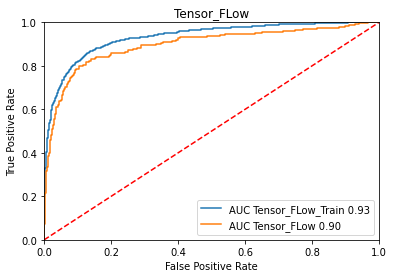

Tensor_FLow CLASSIFICATION ACCURACY
Tensor_FLow_Train  =  0.9028942953020134
Tensor_FLow  =  0.889261744966443
------




In [10]:
F_theShapeSize = U_train.shape[1]
F_theActivation = tf.keras.activations.relu
F_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
F_theOptimizer = tf.keras.optimizers.Adam()
F_theEpochs = 100

F_theUnits = int(2*F_theShapeSize)
F_LAYER_01 = tf.keras.layers.Dense(units=F_theUnits, activation = F_theActivation, input_dim = F_theShapeSize)
F_LAYER_DROP = tf.keras.layers.Dropout( 0.2 ) 
F_LAYER_02 = tf.keras.layers.Dense( units=F_theUnits, activation = F_theActivation)
F_LAYER_OUTPUT = tf.keras.layers.Dense(units=2, activation = tf.keras.activations.softmax)

CLM = tf.keras.Sequential()
CLM.add( F_LAYER_01 )
CLM.add( F_LAYER_02 )
CLM.add( F_LAYER_OUTPUT )

CLM.compile( loss=F_theLossMetric, optimizer=F_theOptimizer)
CLM.fit( U_train, Y_train[TARGET_F], epochs=F_theEpochs, verbose=False )
TRAIN_CLM = get_TF_ProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ TARGET_F ] )
TEST_CLM = get_TF_ProbAccuracyScores( WHO, CLM, U_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

TF_CLM = TEST_CLM.copy()
TF_AMT = TEST_AMT.copy()

### Try at least three different Activation Functions
#### Second Activation Function used tanh (Hyperbolic function) 
- 2. Try one and two hidden layers 
- 3. Try using a Dropout Layer

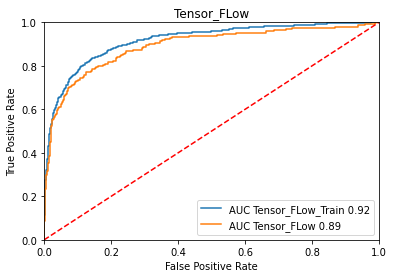

Tensor_FLow CLASSIFICATION ACCURACY
Tensor_FLow_Train  =  0.8955536912751678
Tensor_FLow  =  0.8875838926174496
------




In [11]:
F_theShapeSize = U_train.shape[1]
F_theActivation = tf.keras.activations.tanh 
F_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
F_theOptimizer = tf.keras.optimizers.Adam()
F_theEpochs = 100

F_theUnits = int(2*F_theShapeSize)
F_LAYER_01 = tf.keras.layers.Dense(units=F_theUnits, activation = F_theActivation, input_dim = F_theShapeSize)
F_LAYER_DROP = tf.keras.layers.Dropout( 0.2 ) 
F_LAYER_02 = tf.keras.layers.Dense( units=F_theUnits, activation = F_theActivation)
F_LAYER_OUTPUT = tf.keras.layers.Dense(units=2, activation = tf.keras.activations.softmax)

CLM = tf.keras.Sequential()
CLM.add( F_LAYER_01 )
CLM.add( F_LAYER_02 )
CLM.add( F_LAYER_OUTPUT )

CLM.compile( loss=F_theLossMetric, optimizer=F_theOptimizer)
CLM.fit( U_train, Y_train[TARGET_F], epochs=F_theEpochs, verbose=False )
TRAIN_CLM = get_TF_ProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ TARGET_F ] )
TEST_CLM = get_TF_ProbAccuracyScores( WHO, CLM, U_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


### Try at least three different Activation Functions
#### Third Activation Function used elu (Exponential Linear Unit) 
- 2. Try one and two hidden layers 
- 3. Try using a Dropout Layer

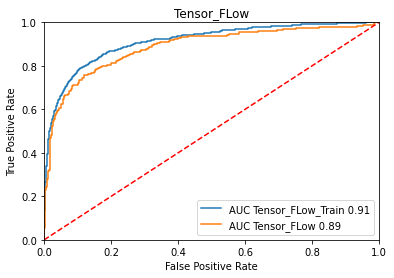

Tensor_FLow CLASSIFICATION ACCURACY
Tensor_FLow_Train  =  0.8888422818791947
Tensor_FLow  =  0.8657718120805369
------




In [12]:
F_theShapeSize = U_train.shape[1]
F_theActivation = tf.keras.activations.elu 
F_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
F_theOptimizer = tf.keras.optimizers.Adam()
F_theEpochs = 100

F_theUnits = int(2*F_theShapeSize)
F_LAYER_01 = tf.keras.layers.Dense(units=F_theUnits, activation = F_theActivation, input_dim = F_theShapeSize)
F_LAYER_DROP = tf.keras.layers.Dropout( 0.2 ) 
F_LAYER_02 = tf.keras.layers.Dense( units=F_theUnits, activation = F_theActivation)
F_LAYER_OUTPUT = tf.keras.layers.Dense(units=2, activation = tf.keras.activations.softmax)

CLM = tf.keras.Sequential()
CLM.add( F_LAYER_01 )
CLM.add( F_LAYER_02 )
CLM.add( F_LAYER_OUTPUT )

CLM.compile( loss=F_theLossMetric, optimizer=F_theOptimizer)
CLM.fit( U_train, Y_train[TARGET_F], epochs=F_theEpochs, verbose=False )
TRAIN_CLM = get_TF_ProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ TARGET_F ] )
TEST_CLM = get_TF_ProbAccuracyScores( WHO, CLM, U_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

### Analysis for Tensor Flow ROC Curve (All 3 Activations Functions)
- I started off with 2 times the shape of the dataset for the nodes which has better accuracy based on ROC curve and compared to when I started removing nodes. So, I decided to stick with 2 times the shape of dataset for the nodes used in the neural network.
- The ROC Curve analysis for Tensor Flow model showed that Area under the curve accuracy using relu activation was much better compare to other activation functions with 90% accuracy for and 89% AUC accuracy for predicting default loans. The ROC curve analysis using tanh (hyperbolic tangent) and elu (exponential linear unit) activation function also performed well but had a little bit lower accuracy at around 88% and 86% for both activation on this particular dataset. The Tensor flow models with relu and tanh activation function had much smoother curve the test and train dataset ROC curve is almost similar and accuracy for both train and test data is really close to one another. showing we are not overfitting the model.

### Display a ROC curve for the test data with all your models on the same graph (tree based, regression, and TF). 

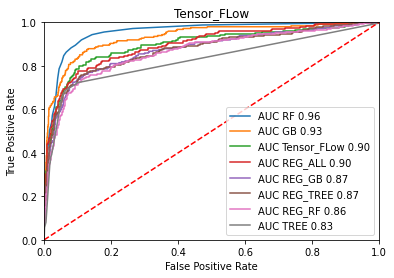

ALL CLASSIFICATION ACCURACY
GB  =  0.9035234899328859
RF  =  0.9018456375838926
Tensor_FLow  =  0.889261744966443
REG_ALL  =  0.886744966442953
TREE  =  0.886744966442953
REG_GB  =  0.8808724832214765
REG_TREE  =  0.8808724832214765
REG_RF  =  0.8674496644295302
------




In [13]:
ALL_CLM = [ TREE_CLM, RF_CLM, GB_CLM, REG_ALL_CLM, REG_TREE_CLM, REG_RF_CLM, REG_GB_CLM, TF_CLM]

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_CLM ) 

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[1], reverse=True )
print_Accuracy( "ALL CLASSIFICATION ACCURACY", ALL_CLM )


### Discuss which one is the most accurate. Which one would you recommend using?

The Tensorflow model using relu activation performed well based on analysis of ROC curve showing 90% accuracy after  adding drop out and hidden layers to the neural network using relu activation function. Since we also selected variables that Random Forest tree model liked it had higher accuracy compare to other regression and tree based models in terms of variables selection techniques affected the results. I would recommend using random forest model since its covering 96% of area under the cover and has highest classification accuracy compared to other models. 

## Tensorflow Model
### Develop a model using Tensor Flow that will predict loss amount given loans default

#### Data Transformation
- We are going to transform the W_train and W_test dataset so that its scales between 0 and 1 put it into V_train and V_test and comvert them into dataframe. The data only has data if their loans are defaults and have loss amount.

### Explore using a variable selection technique

- We are going select from the variables which Gradient Boosting tree based model liked since it has performed well in terms overall RMSE accuracy for this particular dataset compare to other models. We are going to use those variables in the V_train and V_test 


In [14]:
V_train = theScaler.transform( W_train )
V_test = theScaler.transform( W_test )

V_train = pd.DataFrame( V_train )
V_test = pd.DataFrame( V_test )

V_train.columns = list( W_train.columns.values )
V_test.columns = list( W_train.columns.values )

V_train = V_train[ GB_amt ]
V_test = V_test[ GB_amt ]

### Try at least three different Activation Functions
#### First Activation Function used RELU  
- 2. Try one and two hidden layers 
- 3. Try using a Dropout Layer

- A_ is for the flag loss amount given the person has default loans 
- A_theShapeSize is we would like to know whats the size of the dataset. 
- theActivation = tf.keras.activations.linear is linear 
- theLossMetric = tf.keras.losses.MeanSquaredError() the loss metric for linear regression purpose is that it minimizes the mean squared error.
- A_theOptimizer is Adam() function 
- A_theEpochs go through the data 300 times 
- A_theUnits is how many nodes should I have in my theUnits. - I started off with 2 times the shape of the dataset which had the worse RMSE accuracy. To improve it we basically divided into half of the 2 times shape of datase which is original number of variables that Gradient Boosting model like are used for the neural network.
- A_LAYER_01 is a Dense layer 
- A_LAYER_DROP and A_LAYER_02 without input his time. Adding a Dropout layer as well where we are simply saying everytime we run through the iteration throw away 20% of the nodes it will throw away 20% of the nodes from whatever nodes were in LAYER_01 called before it this would prevent it from overfitting the model
- A_LAYER_OUTPUT has 1 input for loss amount given loan defaults. The activation function used is linear
- Create a model called AMT (LOSS AMOUNT) thats a called Sequential() 
- CLM.compile means (The compile simply say this is the loss function we are gonna use to train the neural network and this is the optimizer that is gonna adjust the weights)
- CLM.fit finally model.fit ( Fit the neural network with V_train(input variables), Z_train[TARGET_A] (output variables) and arguments we want)

In [15]:
A_theShapeSize = V_train.shape[1]
A_theActivation = tf.keras.activations.relu
A_theLossMetric = tf.keras.losses.MeanSquaredError()
A_theOptimizer = tf.keras.optimizers.Adam()
A_theEpochs = 300 

A_theUnits = int(2*A_theShapeSize / 2)

A_LAYER_01 = tf.keras.layers.Dense( units=A_theUnits, activation=A_theActivation, input_dim=A_theShapeSize )
A_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
A_LAYER_02 = tf.keras.layers.Dense( units=A_theUnits, activation=A_theActivation )
A_LAYER_OUTPUT = tf.keras.layers.Dense( units=1, activation=tf.keras.activations.linear )

AMT = tf.keras.Sequential()
AMT.add( A_LAYER_01 )
AMT.add( A_LAYER_DROP )
AMT.add( A_LAYER_02 )
AMT.add( A_LAYER_OUTPUT )
AMT.compile( loss=A_theLossMetric, optimizer=A_theOptimizer)

AMT.fit( V_train, Z_train[TARGET_A], epochs=A_theEpochs, verbose=False )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train[GB_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test[GB_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


TF_CLM = TEST_CLM.copy()
TF_AMT = TEST_AMT.copy()

Tensor_FLow RMSE ACCURACY
Tensor_FLow_Train  =  8769.238948974666
Tensor_FLow  =  9019.736396725542
------




### Try at least three different Activation Functions
#### Second Activation Function used selu (Scaled Exponential Linear Unit)
- 2. Try one and two hidden layers 
- 3. Try using a Dropout Layer

In [16]:
A_theShapeSize = V_train.shape[1]
A_theActivation = tf.keras.activations.selu
A_theLossMetric = tf.keras.losses.MeanSquaredError()
A_theOptimizer = tf.keras.optimizers.Adam()
A_theEpochs = 300 

A_theUnits = int(2*A_theShapeSize / 2)

A_LAYER_01 = tf.keras.layers.Dense( units=A_theUnits, activation=A_theActivation, input_dim=A_theShapeSize )
A_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
A_LAYER_02 = tf.keras.layers.Dense( units=A_theUnits, activation=A_theActivation )
A_LAYER_OUTPUT = tf.keras.layers.Dense( units=1, activation=tf.keras.activations.linear )

AMT = tf.keras.Sequential()
AMT.add( A_LAYER_01 )
AMT.add( A_LAYER_DROP )
AMT.add( A_LAYER_02 )
AMT.add( A_LAYER_OUTPUT )
AMT.compile( loss=A_theLossMetric, optimizer=A_theOptimizer)

AMT.fit( V_train, Z_train[TARGET_A], epochs=A_theEpochs, verbose=False )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train[GB_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test[GB_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


Tensor_FLow RMSE ACCURACY
Tensor_FLow_Train  =  8835.905333955421
Tensor_FLow  =  9076.768127243953
------




### Try at least three different Activation Functions
#### Third Activation Function used elu (Exponential Linear Unit) 
- 2. Try one and two hidden layers 
- 3. Try using a Dropout Layer

In [17]:
A_theShapeSize = V_train.shape[1]
A_theActivation = tf.keras.activations.elu
A_theLossMetric = tf.keras.losses.MeanSquaredError()
A_theOptimizer = tf.keras.optimizers.Adam()
A_theEpochs = 300 

A_theUnits = int(2*A_theShapeSize / 2)

A_LAYER_01 = tf.keras.layers.Dense( units=A_theUnits, activation=A_theActivation, input_dim=A_theShapeSize )
A_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
A_LAYER_02 = tf.keras.layers.Dense( units=A_theUnits, activation=A_theActivation )
A_LAYER_OUTPUT = tf.keras.layers.Dense( units=1, activation=tf.keras.activations.linear )

AMT = tf.keras.Sequential()
AMT.add( A_LAYER_01 )
AMT.add( A_LAYER_DROP )
AMT.add( A_LAYER_02 )
AMT.add( A_LAYER_OUTPUT )
AMT.compile( loss=A_theLossMetric, optimizer=A_theOptimizer)

AMT.fit( V_train, Z_train[TARGET_A], epochs=A_theEpochs, verbose=False )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train[GB_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test[GB_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


Tensor_FLow RMSE ACCURACY
Tensor_FLow_Train  =  8802.048091489862
Tensor_FLow  =  9050.460310570488
------




### Analysis for Tensor Flow RMSE Accuracy  (All 3 Activations Functions)
- I started off with 2 times the shape of the dataset which had the worse RMSE accuracy. To improve to we basically half of the 2 time shape of dataset which original variables used. Also, added dropout, hidden layer, and had to increase the number of iteration of data so made epochs to 300 iteration. It gave much better RMSE accuracy compared first testing phase of the model. 

- The RMSE accuracy using Tensor flow for all 3 activation functions are really close to one another. Only the relu activation was little bit better the most widely used one which we used to compare with other models but we still worst than all the other regression and tree models. 

### List the RMSE for the test data set for all of the models created (tree based, regression, and TF). 

In [18]:
ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, TF_AMT ]
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )
print_Accuracy( "ALL LOSS AMOUNT MODEL ACCURACY", ALL_AMT )

ALL LOSS AMOUNT MODEL ACCURACY
GB  =  2201.8194437335387
RF  =  2780.278461970596
REG_ALL  =  3115.7180904557335
REG_GB  =  4029.784013571014
REG_TREE  =  4301.963358361031
REG_RF  =  4360.610292020044
TREE  =  5522.483680969053
Tensor_FLow  =  9019.736396725542
------




### Discuss which one is the most accurate. Which one would you recommend using?

Based on the RMSE accuracy curve results measuring the difference between values predicted by a model and their actual values for loss amount loan Gradient Boosting tree model (GB) as lowest average RMSE score of 2201 dollars loss amount not repaid compare to all other models. Second is Random Forest model (RF) with Root Mean Square error of 2780 dollars loss amount. Surprisingly, Tensorflow Model had worse RMSE accuracy for this dataset even after adding dropout, hidden layers, removing nodes, and increase iteration for running the data compared to all other regression and tree based models. Based on the All Loss Amount Model Accuracy we can recommend using Gradient Boosting and Random Forest model since they have the highest RMSE square error. 

## Summary Report

#### Include a discussion of the which models were most accurate, and which ones would you recommend using in a real world situation.
- The random forest tree model (RF) considerably more accurate with 96% covering area under the curve compare to all other models. Second is Gradient boosting model (GB) is at 93% accuracy is a little bit closer to Gradient Boosting showing ensemble appoarch in predicting loans defaults. The Tensorflow model using relu activation performed well based on analysis of ROC curve showing 90% accuracy after adding drop out and hidden layers to the neural network. I would recommend using random forest model since its covering 96% of area under the cover and has highest classification accuracy compared to other models. But recommend trying out simple Decision Tree based and Regression ALL variables model to see how the accuracy and how model behaves when we use all variables for real world situation.

####  For any analysis of the coefficients, discuss whether or not they make sense. If any variable does not make sense, what would you recommend?
- The variable selection techniques for Tensor flow models based on the variables which Random Forest tree based model liked since it has performed well in terms overall ROC curve for this particular dataset for predicting default loans. And the variable which Gradient Boosting liked for predicting loss amount since it performed well from RMSE score perspective compare to other models. The variables made sense and to improve Tensor model accuracy for this dataset I would recommend doing variable selection technque based the variables that tree based model liked. 

#### If you were to select one of these models to put into production, which would it be? Why would you select this model?
- I would Random Forest tree based model to put into production for this dataset to predict both default loans and loss amount if loan was not repaid. The reason for selecting this model based onf ROC curve and RMSE accuracy results for Random Forest and Gradient was almost similar high accuracy compare to other models. My second choice would have been Gradient Boosting because as int tends to build very shallow trees but we have to look at is it legal to use based business rules before deploying in production. I would recommend selecting Tensorflow model in production because it performed really bad for predicting loss amount not repaid given default loans in the RMSE analysis. Also its harder to deploy in production for Home Equity Loan area because of if something illegal happened such as discriminatory practices it would be harder to debug.

### Tensor Flow Model To Predict Loan Defaults:
#### Discuss which one is the most accurate. Which one would you recommend using?
- The Tensorflow model using relu activation performed well based on analysis of ROC curve showing 90% accuracy after adding drop out and hidden layers to the neural network using relu activation function. Since we also selected variables that Random Forest tree model liked it had higher accuracy compare to other regression and tree based models in terms of variables selection techniques affected the results. I would recommend using random forest model since its covering 96% of area under the cover and has highest classification accuracy compared to other models.

### Tensor Flow Model to Predict Loss Given Defaults:
#### Discuss which one is the most accurate. Which one would you recommend using?
- Based on the RMSE accuracy curve results measuring the difference between values predicted by a model and their actual values for loss amount loan Gradient Boosting tree model (GB) as lowest average RMSE score of 2201 dollars loss amount not repaid compare to all other models. Second is Random Forest model (RF) with Root Mean Square error of 2780 dollars loss amount. Surprisingly, Tensorflow Model had worse RMSE accuracy for this dataset even after adding dropout, hidden layers, removing nodes, and increase iteration for running the data compared to all other regression and tree based models. Based on the All Loss Amount Model Accuracy we can recommend using Gradient Boosting and Random Forest model since they have the highest RMSE square error.
